In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

import required libraries

In [6]:
%matplotlib inline

show output in the notebook itselt

In [67]:
vic_map=gpd.read_file(r'C:\Melbourne_Escooter\RealDataset\shapefiles\vic_loc_polygon_shp\VIC_LOC_POLYGON_shp\vic_localities.shp')

read shape file (victoria suburbs)

In [70]:
vic_map.head()

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
0,lcp6229215ba53f,locb0dcb52a6b55,2021-06-24,Abbeyard,Gazetted Locality,VIC,"POLYGON ((146.81721 -37.09735, 146.81729 -37.0..."
1,lcp386f2bcf9bce,locb9872f35df41,2021-06-24,Abbotsford,Gazetted Locality,VIC,"POLYGON ((145.00235 -37.80723, 145.00350 -37.8..."
2,lcp122c942a8fc9,loc8123ed12ea8d,2021-06-24,Aberfeldie,Gazetted Locality,VIC,"POLYGON ((144.89830 -37.76465, 144.89790 -37.7..."
3,lcp9f50bd795d16,loc1eb4a229104a,2021-06-24,Aberfeldy,Gazetted Locality,VIC,"POLYGON ((146.39447 -37.71008, 146.39405 -37.7..."
4,lcp59bf69caacb0,locb17be87767e1,2021-06-24,Acheron,Gazetted Locality,VIC,"POLYGON ((145.75030 -37.24313, 145.75036 -37.2..."


check map files content

<AxesSubplot:>

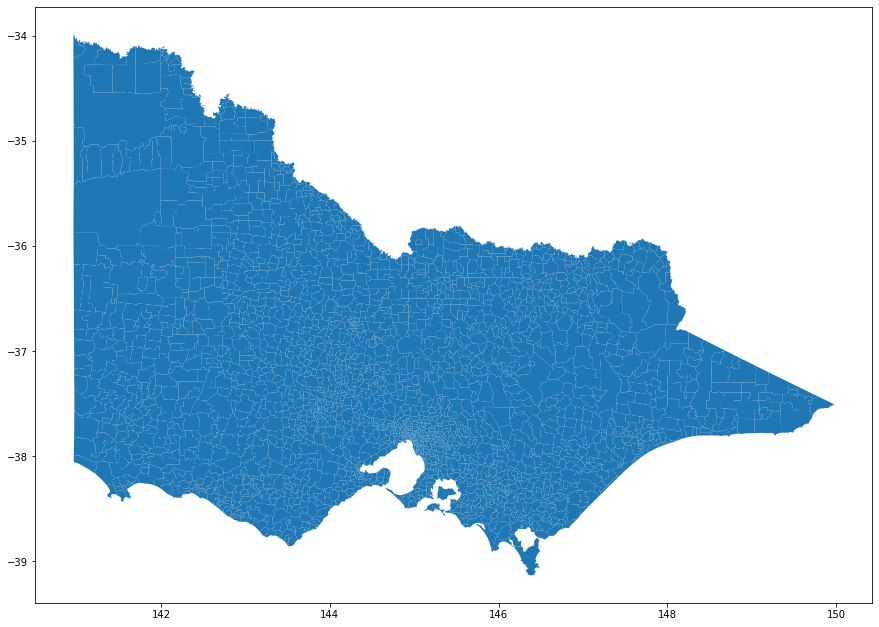

In [71]:
fig, ax=plt.subplots(figsize=(15,15))
vic_map.plot(ax=ax)

plot shape file

In [72]:
data_file=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\1\TripCountsbySuburb.csv')

read csv contining suburb name and trip counts relevant to each suburb

In [84]:
map_and_stats=vic_map.merge(data_file, on="LOC_NAME", how="left")

merge map and csv file on common column (suburb name).
By left merge, we get all values in the map disregard we have trips in that suburb or not

In [90]:
map_and_stats['count'] = map_and_stats['count'].fillna(0)

make null cells of trip count into zero

In [91]:
map_and_stats

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,count
0,lcp6229215ba53f,locb0dcb52a6b55,2021-06-24,Abbeyard,Gazetted Locality,VIC,"POLYGON ((146.81721 -37.09735, 146.81729 -37.0...",0.0
1,lcp386f2bcf9bce,locb9872f35df41,2021-06-24,Abbotsford,Gazetted Locality,VIC,"POLYGON ((145.00235 -37.80723, 145.00350 -37.8...",38.0
2,lcp122c942a8fc9,loc8123ed12ea8d,2021-06-24,Aberfeldie,Gazetted Locality,VIC,"POLYGON ((144.89830 -37.76465, 144.89790 -37.7...",0.0
3,lcp9f50bd795d16,loc1eb4a229104a,2021-06-24,Aberfeldy,Gazetted Locality,VIC,"POLYGON ((146.39447 -37.71008, 146.39405 -37.7...",0.0
4,lcp59bf69caacb0,locb17be87767e1,2021-06-24,Acheron,Gazetted Locality,VIC,"POLYGON ((145.75030 -37.24313, 145.75036 -37.2...",0.0
...,...,...,...,...,...,...,...,...
2968,lcpb56552620eee,loc81a970cc91ee,2021-06-24,Yundool,Gazetted Locality,VIC,"POLYGON ((145.85808 -36.26996, 145.85813 -36.2...",0.0
2969,lcp8d12ab6daadf,loc974441b38fa0,2021-06-24,Yuroke,Gazetted Locality,VIC,"POLYGON ((144.87770 -37.58472, 144.87867 -37.5...",0.0
2970,lcpa9e83d4e09c3,locffa8d48503ab,2021-06-24,Yuulong,Gazetted Locality,VIC,"POLYGON ((143.29976 -38.75116, 143.29895 -38.7...",0.0
2971,lcpef1f172412c6,locadbdb687a089,2021-06-24,Zeerust,Gazetted Locality,VIC,"POLYGON ((145.38004 -36.26998, 145.37896 -36.2...",0.0


view merged output

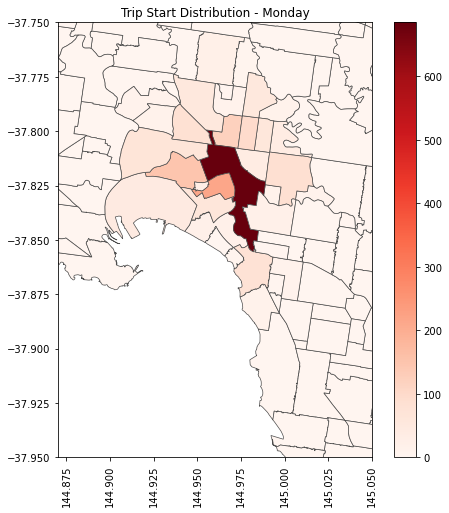

In [106]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.title('Trip Start Distribution - Monday')
plt.xticks(rotation=90)
map_and_stats.plot(column="count", cmap="Reds", linewidth=0.7, ax=ax, edgecolor=".3")
ax.set_xlim(144.87, 145.05)
ax.set_ylim(-37.950, -37.750)
#ax.axis("off")

bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=685))
bar_info._A = []
cbar = fig.colorbar(bar_info)


1. add title
2.make axis label horizontal
3. Draw red heat map based on count column
4. zoom map into interested area
5. plot inforamtion bar

# Trip starts by suburbs on map ----->

In [172]:
vic_map=gpd.read_file(r'C:\Melbourne_Escooter\RealDataset\shapefiles\vic_loc_polygon_shp\VIC_LOC_POLYGON_shp\vic_localities.shp')

In [173]:
data_file1=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\1\TripCountsbySuburb.csv')

In [174]:
data_file2=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\2\TripCountsbySuburb.csv')

In [175]:
data_file3=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\3\TripCountsbySuburb.csv')

In [176]:
data_file4=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\4\TripCountsbySuburb.csv')

In [177]:
data_file5=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\5\TripCountsbySuburb.csv')

In [178]:
data_file6=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\6\TripCountsbySuburb.csv')

In [195]:
data_file7=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\PerDay\7\TripCountsbySuburb.csv')

In [180]:
map_and_stats1=vic_map.merge(data_file1, on="LOC_NAME", how="left")

In [181]:
map_and_stats2=vic_map.merge(data_file2, on="LOC_NAME", how="left")

In [182]:
map_and_stats3=vic_map.merge(data_file3, on="LOC_NAME", how="left")

In [183]:
map_and_stats4=vic_map.merge(data_file4, on="LOC_NAME", how="left")

In [184]:
map_and_stats5=vic_map.merge(data_file5, on="LOC_NAME", how="left")

In [185]:
map_and_stats6=vic_map.merge(data_file6, on="LOC_NAME", how="left")

In [196]:
map_and_stats7=vic_map.merge(data_file7, on="LOC_NAME", how="left")

In [187]:
map_and_stats1['count'] = map_and_stats1['count'].fillna(0)

In [188]:
map_and_stats2['count'] = map_and_stats2['count'].fillna(0)

In [189]:
map_and_stats3['count'] = map_and_stats3['count'].fillna(0)

In [190]:
map_and_stats4['count'] = map_and_stats4['count'].fillna(0)

In [191]:
map_and_stats5['count'] = map_and_stats5['count'].fillna(0)

In [192]:
map_and_stats6['count'] = map_and_stats6['count'].fillna(0)

In [197]:
map_and_stats7['count'] = map_and_stats7['count'].fillna(0)

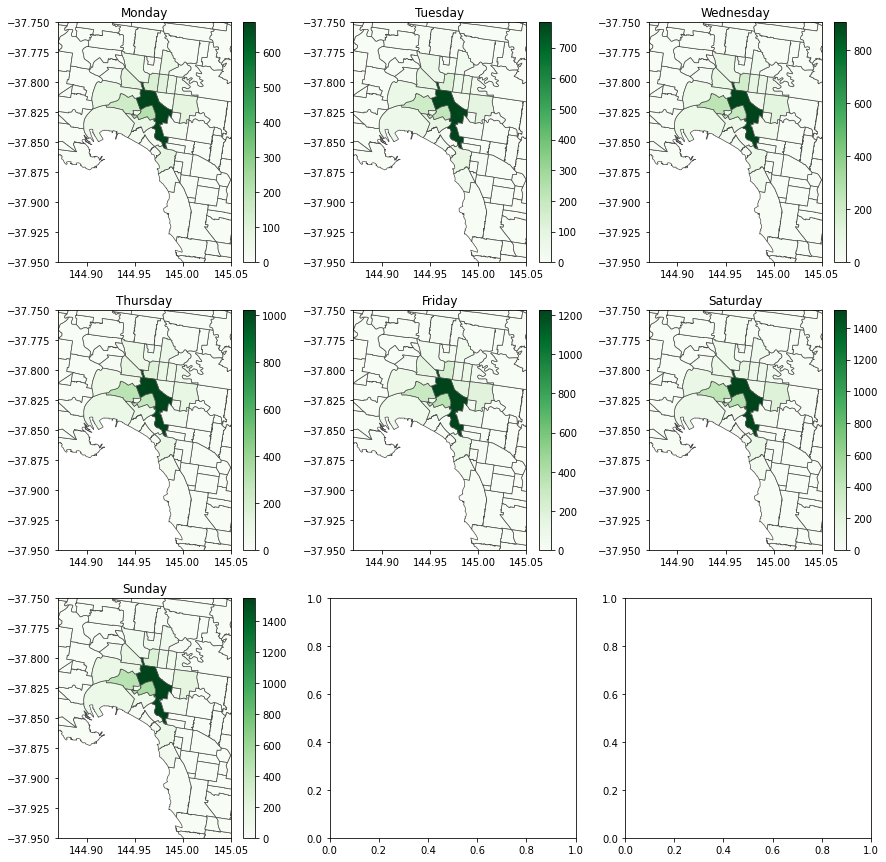

In [210]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
#map and info bar for monday
ax[0, 0].set_title("Monday")
map_and_stats1.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[0,0], edgecolor=".3")
ax[0,0].set_xlim(144.87, 145.05)
ax[0,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=685))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,0])
#map and info bar for tue
ax[0, 1].set_title("Tuesday")
map_and_stats2.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[0,1], edgecolor=".3")
ax[0,1].set_xlim(144.87, 145.05)
ax[0,1].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=782))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,1])
#map and info bar for wed
ax[0, 2].set_title("Wednesday")
map_and_stats3.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[0,2], edgecolor=".3")
ax[0,2].set_xlim(144.87, 145.05)
ax[0,2].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=906))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,2])
#map and info bar for thur
ax[1,0].set_title("Thursday")
map_and_stats4.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[1,0], edgecolor=".3")
ax[1,0].set_xlim(144.87, 145.05)
ax[1,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=1020))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,0])
#map and info bar for fri
ax[1, 1].set_title("Friday")
map_and_stats5.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[1,1], edgecolor=".3")
ax[1,1].set_xlim(144.87, 145.05)
ax[1,1].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=1225))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,1])
#map and info bar for sat
ax[1,2].set_title("Saturday")
map_and_stats6.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[1,2], edgecolor=".3")
ax[1,2].set_xlim(144.87, 145.05)
ax[1,2].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=1512))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,2])
#map and info bar for sunday
ax[2,0].set_title("Sunday")
map_and_stats7.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[2,0], edgecolor=".3")
ax[2,0].set_xlim(144.87, 145.05)
ax[2,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=1551))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[2,0])




# Trip ends by suburbs on map ----->

In [211]:
vic_map=gpd.read_file(r'C:\Melbourne_Escooter\RealDataset\shapefiles\vic_loc_polygon_shp\VIC_LOC_POLYGON_shp\vic_localities.shp')

In [212]:
data_1=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\1\TripCountsbySuburb.csv')

In [213]:
data_2=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\2\TripCountsbySuburb.csv')

In [214]:
data_3=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\3\TripCountsbySuburb.csv')

In [215]:
data_4=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\4\TripCountsbySuburb.csv')

In [216]:
data_5=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\5\TripCountsbySuburb.csv')

In [217]:
data_6=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\6\TripCountsbySuburb.csv')

In [218]:
data_7=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\PerDay\7\TripCountsbySuburb.csv')

In [219]:
map_and_data1=vic_map.merge(data_1, on="LOC_NAME", how="left")

In [220]:
map_and_data2=vic_map.merge(data_2, on="LOC_NAME", how="left")

In [221]:
map_and_data3=vic_map.merge(data_3, on="LOC_NAME", how="left")

In [222]:
map_and_data4=vic_map.merge(data_4, on="LOC_NAME", how="left")

In [223]:
map_and_data5=vic_map.merge(data_5, on="LOC_NAME", how="left")

In [224]:
map_and_data6=vic_map.merge(data_6, on="LOC_NAME", how="left")

In [225]:
map_and_data7=vic_map.merge(data_7, on="LOC_NAME", how="left")

In [226]:
map_and_data1['count'] = map_and_data1['count'].fillna(0)

In [227]:
map_and_data2['count'] = map_and_data2['count'].fillna(0)

In [228]:
map_and_data3['count'] = map_and_data3['count'].fillna(0)

In [229]:
map_and_data4['count'] = map_and_data4['count'].fillna(0)

In [230]:
map_and_data5['count'] = map_and_data5['count'].fillna(0)

In [231]:
map_and_data6['count'] = map_and_data6['count'].fillna(0)

In [232]:
map_and_data7['count'] = map_and_data7['count'].fillna(0)

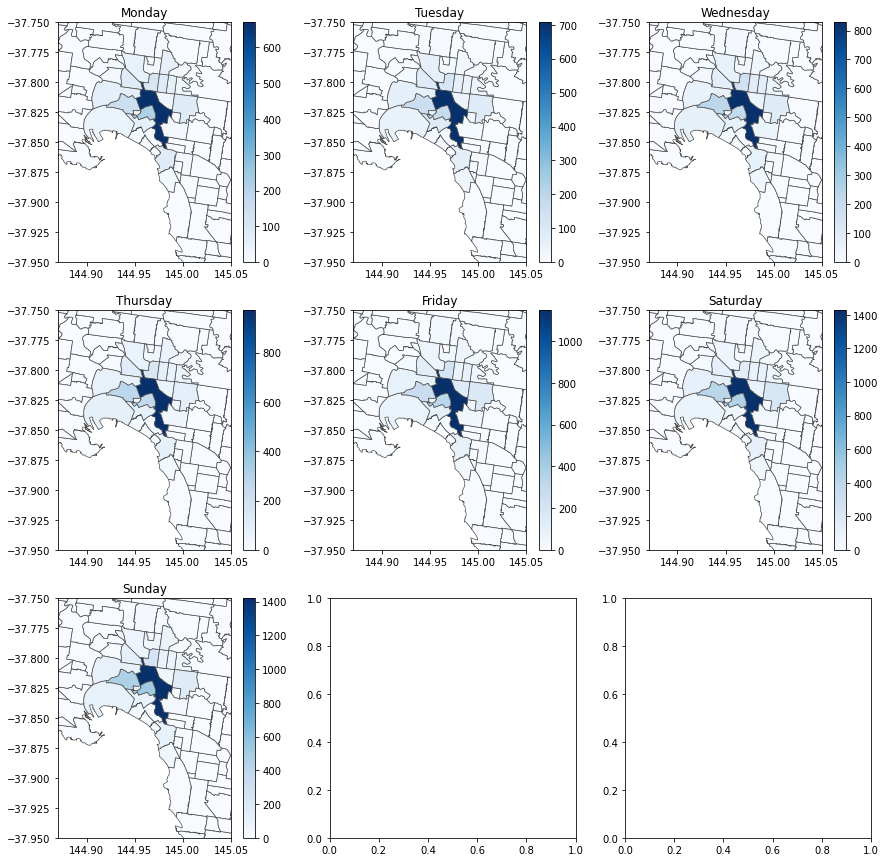

In [236]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
#map and info bar for monday
ax[0, 0].set_title("Monday")
map_and_data1.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[0,0], edgecolor=".3")
ax[0,0].set_xlim(144.87, 145.05)
ax[0,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=670))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,0])
#map and info bar for tue
ax[0, 1].set_title("Tuesday")
map_and_data2.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[0,1], edgecolor=".3")
ax[0,1].set_xlim(144.87, 145.05)
ax[0,1].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=707))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,1])
#map and info bar for wed
ax[0, 2].set_title("Wednesday")
map_and_data3.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[0,2], edgecolor=".3")
ax[0,2].set_xlim(144.87, 145.05)
ax[0,2].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=828))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0,2])
#map and info bar for thur
ax[1,0].set_title("Thursday")
map_and_data4.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[1,0], edgecolor=".3")
ax[1,0].set_xlim(144.87, 145.05)
ax[1,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=972))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,0])
#map and info bar for fri
ax[1, 1].set_title("Friday")
map_and_data5.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[1,1], edgecolor=".3")
ax[1,1].set_xlim(144.87, 145.05)
ax[1,1].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=1148))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,1])
#map and info bar for sat
ax[1,2].set_title("Saturday")
map_and_data6.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[1,2], edgecolor=".3")
ax[1,2].set_xlim(144.87, 145.05)
ax[1,2].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=1428))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1,2])
#map and info bar for sunday
ax[2,0].set_title("Sunday")
map_and_data7.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[2,0], edgecolor=".3")
ax[2,0].set_xlim(144.87, 145.05)
ax[2,0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=1422))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[2,0])



# Trip Start/End counts of whole week by suburbs------->

In [237]:
vic_map=gpd.read_file(r'C:\Melbourne_Escooter\RealDataset\shapefiles\vic_loc_polygon_shp\VIC_LOC_POLYGON_shp\vic_localities.shp')

In [244]:
df_start=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Started\week1\per_week_start_counts_by_suburb-columnwise.csv')
df_stop=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\August\Stopped\week1\per_week_end_counts_by_suburb-columnwise.csv')

In [246]:
map_and_start=vic_map.merge(df_start, on="LOC_NAME", how="left")
map_and_stop=vic_map.merge(df_stop, on="LOC_NAME", how="left")

In [247]:
map_and_start['count'] = map_and_start['count'].fillna(0)
map_and_stop['count'] = map_and_stop['count'].fillna(0)

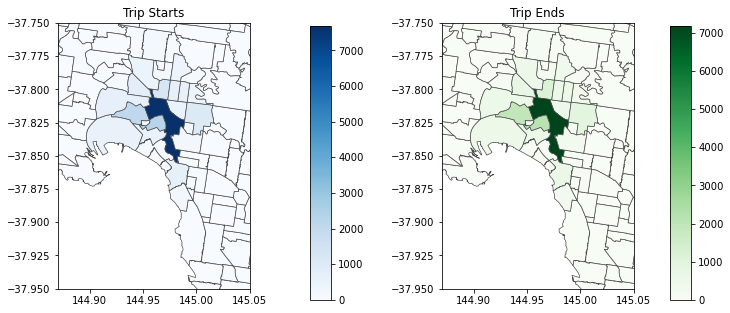

In [263]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
#map and info bar for monday
ax[0].set_title("Trip Starts")
map_and_start.plot(column="count", cmap="Blues", linewidth=0.7, ax=ax[0], edgecolor=".3")
ax[0].set_xlim(144.87, 145.05)
ax[0].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=7678))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[0], cax = fig.add_axes([0.45, 0.3, 0.03, 0.38]))

ax[1].set_title("Trip Ends")
map_and_stop.plot(column="count", cmap="Greens", linewidth=0.7, ax=ax[1], edgecolor=".3")
ax[1].set_xlim(144.87, 145.05)
ax[1].set_ylim(-37.950, -37.750)
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=7175))
bar_info._A = []
cbar = fig.colorbar(bar_info,ax=ax[1],cax = fig.add_axes([0.95, 0.3, 0.03, 0.38]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1.0, 
                    hspace=1.0)